In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [24]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [40]:
from inference.sample import StockSampler

m=2

sampler = StockSampler(array, tickers, dates, m=m)

In [41]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [ 30.625     ,   1.00823045,   3.45833325, ...,   0.85416669,
          1.2578125 ,   1.9375    ],
       [ 31.        ,   1.02469134,   3.44791675, ...,   0.84375   ,
          1.25390625,   1.96875   ],
       ...,
       [ 71.80000305, 354.32000732, 140.32000732, ...,  46.34000015,
        135.05999756,  79.11000061],
       [ 70.69999695, 349.1499939 , 139.05000305, ...,  45.88999939,
        133.50999451,  79.55999756],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [42]:
sampler.sample(100)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 177.35it/s]


In [43]:
from inference.analyse import StockAnalysis

params = {"theta": sampler.theta, "b2":sampler.b2}

analyser = StockAnalysis(sampler.prices_array, sampler.etas + sampler.Rs,
                        sampler.tickers, params, dates=sampler.dates, m=m)

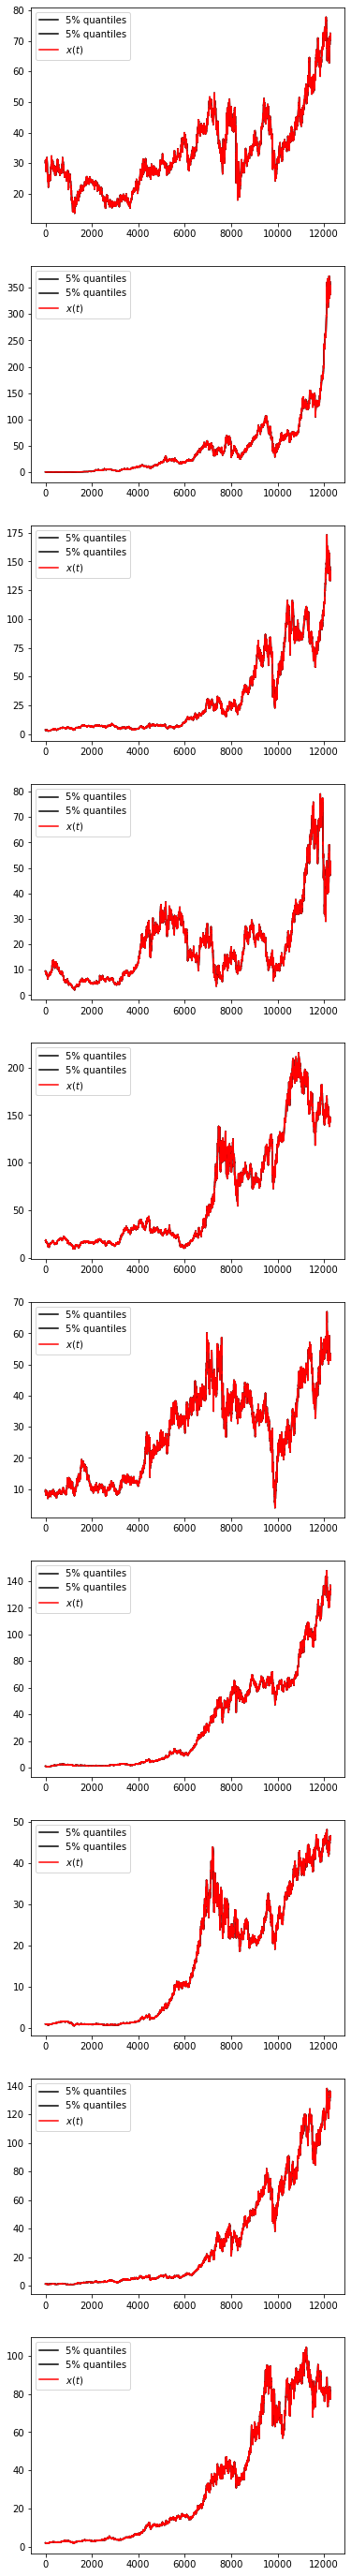

In [44]:
analyser.plot_quantiles()

In [45]:
index_list = [1,2,3,5,6,7,8,9]
observed_tickers = [sampler.tickers[i] for i in index_list]

No handles with labels found to put in legend.


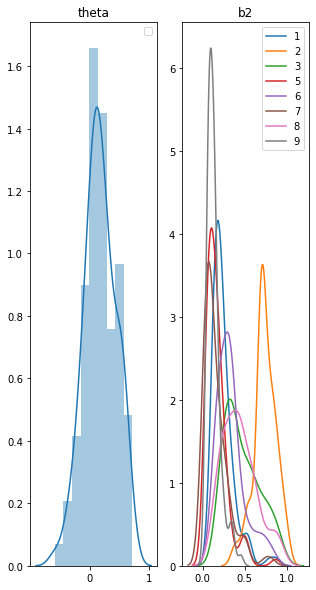

In [46]:
analyser.plot_parameter_distributions(observed_tickers)

In [47]:
sampler.tickers

['AEP', 'BA', 'CAT', 'FL', 'IBM', 'IP', 'JNJ', 'KO', 'UTX', 'XOM']

In [48]:
sampler.b2

array([[0.25230025, 0.29261459, 0.48131566, 0.45092207, 0.21897935,
        0.86541873, 0.16017074, 0.22451947, 0.1350542 , 0.16847323],
       [0.25230025, 0.21263375, 0.48131566, 0.65455458, 0.21897935,
        0.07289431, 0.14665969, 0.03152665, 0.1350542 , 0.14238773],
       [0.25230025, 0.2452157 , 0.70870584, 0.48363841, 0.21897935,
        0.092462  , 0.23800358, 0.26811457, 0.14057266, 0.07721255],
       [0.25230025, 0.2450932 , 0.88223882, 0.31816244, 0.21897935,
        0.19549775, 0.32336703, 0.81372981, 0.48635589, 0.06950875],
       [0.25230025, 0.23645137, 0.88223882, 0.59532079, 0.21897935,
        0.1819995 , 0.35511651, 0.05022529, 0.31074759, 0.18460542],
       [0.25230025, 0.18157588, 0.76038754, 0.56477161, 0.21897935,
        0.07955097, 0.14279231, 0.13980179, 0.16159148, 0.15070493],
       [0.25230025, 0.14087543, 0.76038754, 0.95261076, 0.21897935,
        0.1379972 , 0.70583931, 0.0934297 , 0.5463374 , 0.12048076],
       [0.25230025, 0.18513019, 0.7603875